11501568/11490434 [==============================] - 0s 0us/step


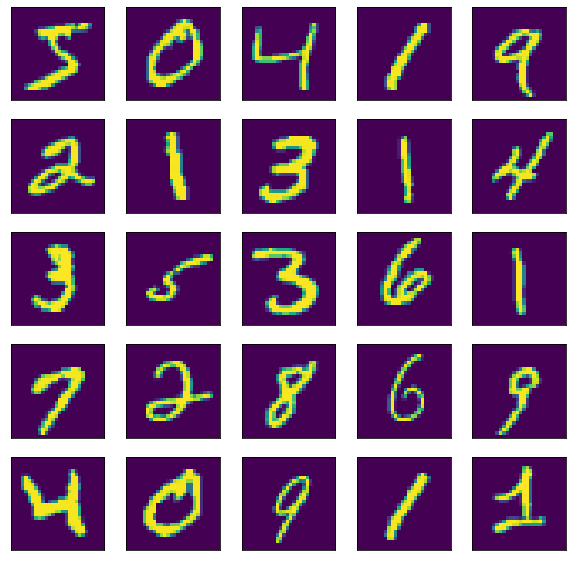

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 100)               288100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 34s 17ms/step - loss: 0.1596 - accuracy: 0.9519 - val_loss: 0.0591 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0400 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0387 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0369 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.0442 - val_accura

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST data
(Xtrain, ytrain), (Xtest, ytest) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
Xtrain, Xtest = Xtrain / 255.0, Xtest / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=10, 
                    validation_data=(Xtest, ytest))

In [2]:
import numpy as np
print(np.shape(Xtrain))
print(Xtrain[0])
print(np.shape(ytrain))
print(ytrain[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [3]:
import numpy as np 
from PIL import Image 

#MUST RUn PREVIOUS CELL FIRST to train the digit recognition
#load the photo shop images and get them into keras compatible format

test_data = [] 
test_labels = [] 
for digit in range(10): 
  im = Image.open(f"/content/drive/MyDrive/Colab Notebooks/{digit}ps4.png","r") 
  pixels = list(im.getdata()) 
  pixels = [(255-comp)/255. for (comp, _, _) in pixels] 
  test_data.append(np.reshape(pixels,(28,28)))
  test_labels.append(digit)
print(np.shape(test_data))
print(test_data[0])
print(np.shape(test_labels))
print(test_labels[0])
print(Xtrain[:1])
print(test_data[:1])
predictions = model.predict(np.array(test_data))
print(predictions)
print([np.argmax(p) for p in predictions])

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image
import time

# returns a tuple(total time, accuracy for that run)
def trialrun(numfeaturemaps, poolsize):
  # Load the CIFAR10 data
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalize pixel values to be between 0 and 1
  train_images, test_images = train_images / 255.0, test_images / 255.0
  train_images = train_images[:1000]
  train_labels = train_labels[:1000]
  test_images = test_images[:100]
  test_labels = test_labels[:100]

  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i])
      # The CIFAR labels happen to be arrays, 
      # which is why you need the extra index
      plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

  model = models.Sequential()
  model.add(layers.Conv2D(numfeaturemaps/2, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(poolsize))
  model.add(layers.Conv2D(numfeaturemaps, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(numfeaturemaps, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  model.summary()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  start = time.time()
  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(test_images, test_labels))
  finish = time.time()
  elapsed = finish-start
  return (elapsed, np.max(history.history['accuracy']))

featmapresults = []
for numfeatmaps in [5, 10, 20, 30, 50]:
  featmapresults.append(trialrun(numfeatmaps, (3,3)))

poolresults = []
for poolsize in [(1,1), (2,2), (3,3)]:
  poolresults.append(trialrun(64, poolsize))  

In [ ]:
print(poolresults)
print(featmapresults)

In [ ]:
# plot the sub
# create a figure
fig = plt.figure()
 
# define subplots and their positions in figure
plt1 = fig.add_subplot(221)
plt2 = fig.add_subplot(222)
plt3 = fig.add_subplot(223)
plt4 = fig.add_subplot(224)

featX = [5,10,20,30,50]
featY = []
for tup in featmapresults:
  featY.append(tup[0])

print(f"top left is featmap results: Time vs. (5,10,20,30,50)")
plt1.plot(featX, featY)


featX2 = [5,10,20,30,50]
featY2 = []
for tup in featmapresults:
  featY2.append(tup[1])

print(f" top right is featmap results: Accuracy vs. (5,10,20,30,50)")
plt2.plot(featX2, featY2)


poolX = [1,2,3]
poolY = []
for tup in poolresults:
  poolY.append(tup[0])

print(f" bottom left is pool results: Time vs. (1,1),(2,2),(3,3)")
plt3.plot(poolX, poolY)


poolX2 = [1,2,3]
poolY2 = []
for tup in poolresults:
  poolY2.append(tup[1])

print(f" bottom right is pool results: Accuracy vs. (1,1),(2,2),(3,3)")
plt4.plot(poolX2, poolY2)

In [4]:
# you must run the DownloadCIFAR10LikeData notebook first to download all the images into your cifartest folder
# then you must run the previous cell to train the CIFAR10 model!
# this cell simply resizes all the downloaded images to 32,32 naively without preserving scale
import os
import random as rd

# this cell resizes the largest square chunk from the center of the image preserving scale but potentially cropping data
# https://note.nkmk.me/en/python-pillow-image-crop-trimming/
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

# center specifies whether to do a square crop out of the center before resizing
def test_cifar_like_data(center = False):
  test_images = []
  test_data = []
  test_labels = []
  test_filenames = []
  for label, name in enumerate(class_names):
    directory_in_str = f"/content/drive/MyDrive/Colab Notebooks/cifartest/{name}"
    directory = os.fsencode(directory_in_str)
    for file in os.listdir(directory):
      filename = os.fsdecode(file)
      if filename.endswith(".jpg") or filename.endswith(".png"): 
        im = Image.open(directory_in_str + "/" + filename,"r")
        if center:
          im = crop_max_square(im)
        im = im.resize((32,32))
        pixels = list(im.getdata())
        if type(pixels[0]) is tuple:
          test_images.append(im)
          test_filenames.append(filename)
          if len(pixels[0])==3:
            normalized = [(r/255.,g/255.,b/255.) for r, g, b in pixels]
          elif len(pixels[0])==4:
            normalized = [(r/255.,g/255.,b/255.) for r, g, b, _ in pixels]
          test_data.append(np.reshape(normalized,(32,32,3)))
          test_labels.append(label)

  # now that we have all the data ready,
  # let's run the tests!
  predictions = model.predict(np.array(test_data))
  test_answers = [np.argmax(p) for p in predictions]
  print(test_answers)
  print(test_labels)
  diffs = np.subtract(test_answers, test_labels)
  cnt = 0
  for diff in diffs:
    if diff==0:
      cnt = cnt + 1
  if center:
    print("RESULTS: max square cropping out of center before resizing to 32x32")
  else:
    print("RESULTS: naive resizing of downloaded images to 32x32")
  print(f"{cnt} correct out of {len(test_labels)} == {100*cnt/(len(test_labels))} accuracy")

  # let's do a finer grain analysis of the percent correct from each class ... plus prep right/wrong lists for plot afterwards
  corrects = [[] for _ in range(10)]
  wrongs = [[] for _ in range(10)]
  for i, label in enumerate(test_labels):
    if test_answers[i] == label:
      corrects[label].append((test_images[i],label,test_filenames[i]))
    else:
      wrongs[label].append((test_images[i], test_answers[i], test_filenames[i]))

  # now let's display the stats first
  print("detailed stats")
  for i in range(10):
    print(f"{class_names[i]}: {len(corrects[i])} out of {len(corrects[i])+len(wrongs[i])} correct.")

  # pick 5 correct and 5 wrong from each class ... note that there may not be 5 correct (or 5 wrong)
  fig = plt.figure(figsize=(20,20))
  plti = 1 # the overall image count
  for classi in range(10):
    # pick random samples from both with the correct ones first so they show up in LEFT side of giant plot
    correctsamples = rd.sample(corrects[classi], min(len(corrects[classi]),5))
    wrongsamples = rd.sample(wrongs[classi],min(len(wrongs[classi]),5))
    allsamples = correctsamples + wrongsamples
    
    # simply duplicate the wrong one at the end if we didn't have 10
    while len(allsamples)<10:
      allsamples = allsamples + [allsamples[len(allsamples)-1]]
      
    for sample in allsamples:
      plt.subplot(10,10,plti)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(sample[0])
      plt.xlabel(f"predicted:{class_names[sample[1]]}\n actual:{class_names[classi]}\n filename:{sample[2]}")
      plti = plti + 1
  plt.tight_layout(h_pad=3, w_pad=0)
  plt.show()

# now run the test twice (once without cropping and once with max-square cropping)
test_cifar_like_data()
test_cifar_like_data(True)

NameError: ignored